In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [5]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Nomor 1
# Descriptive Statistics

In [6]:
df = pd.read_csv('churn.csv')
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [7]:
numerical = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
categorical = ['Surname','Gender','Geography']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df[numerical].describe()

CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min         1.000000      0.00000        0.000000        11.580000   
25%         1.000000      0.00000        0.000000     51002.110000   
50%         1.000000      1.00000        1.000000    100193.915000   
75%         2.000000      1.00000        1.000000    149388.247500   
max         4.000000      1.00000        1.000000    199992.480000   

             Exited  
count  10000.000000  
mean       0.203700  
std        0.402769  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [11]:
df[categorical].describe()

Surname Gender Geography
count    10000  10000     10000
unique    2932      2         3
top      Smith   Male    France
freq        32   5457      5014

## Hasil Observasi

A. Untuk kolom HasCrCard, Is ActiveMember, dan Exited lebih baik bertipe data string atau object (kategorikal). <br>
B. Tidak ada kolom yang memiliki nilai kosong. <br>
C. Semua kolom diasumsikan normal, tidak ada keanehan dalam statistik dekriptifnya.

# Nomor 2
# Univariate Analysis

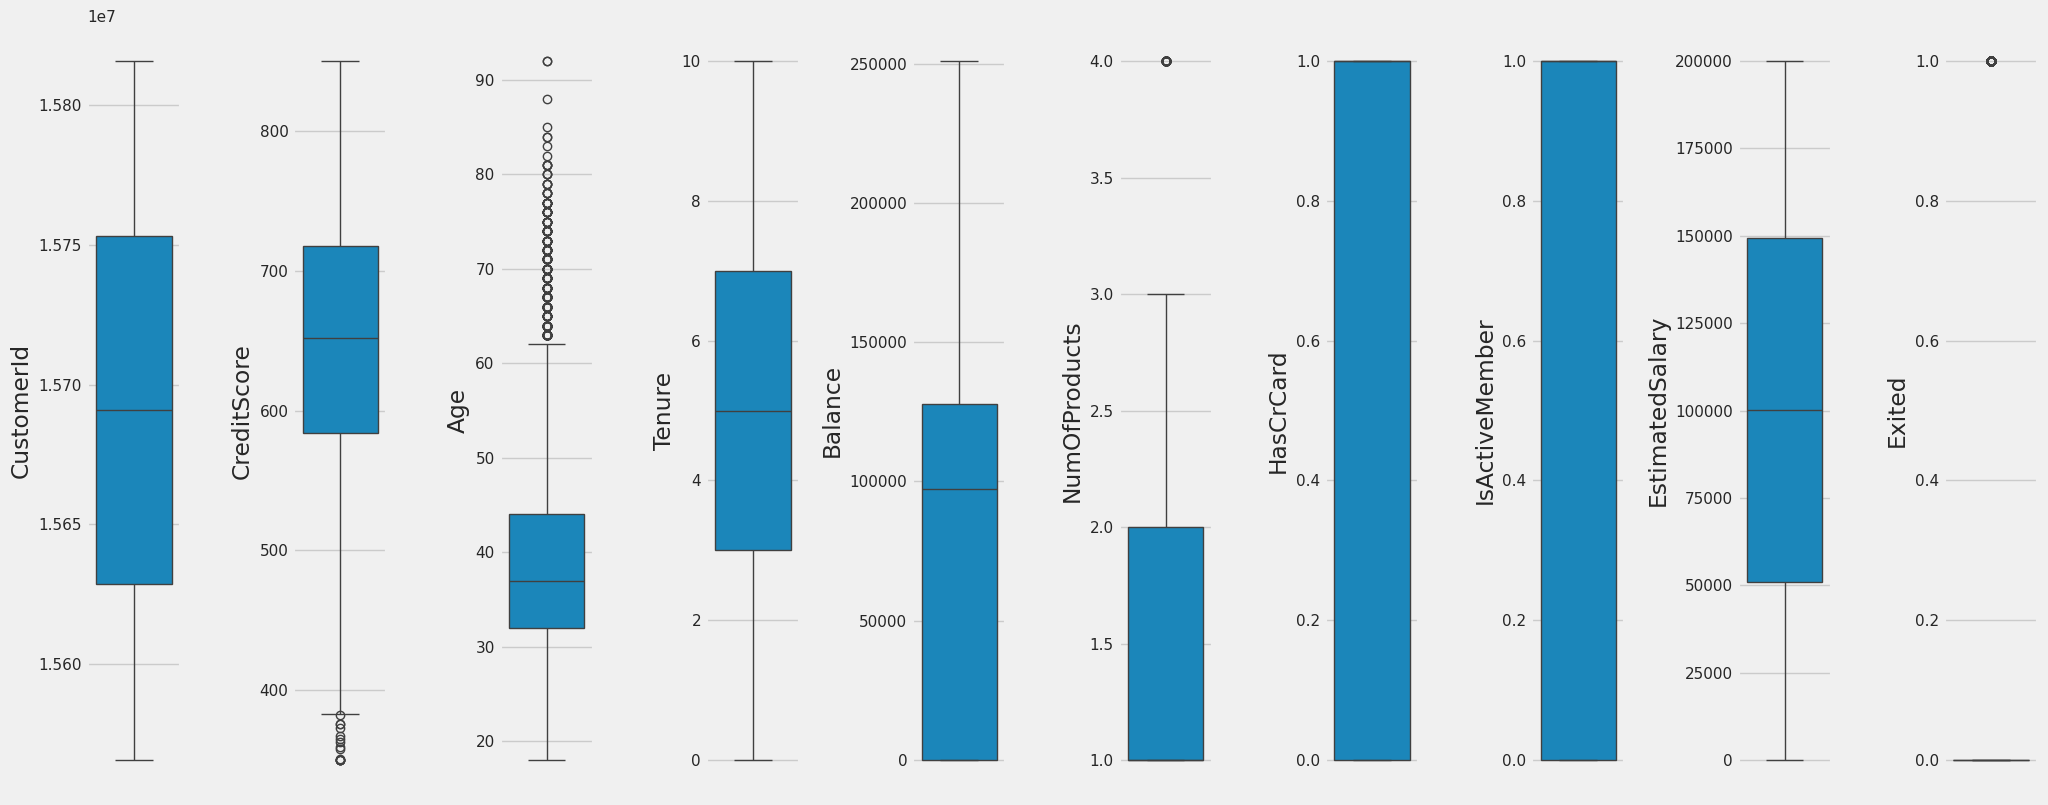

In [12]:
# Individual Boxplots (Numeric)

features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

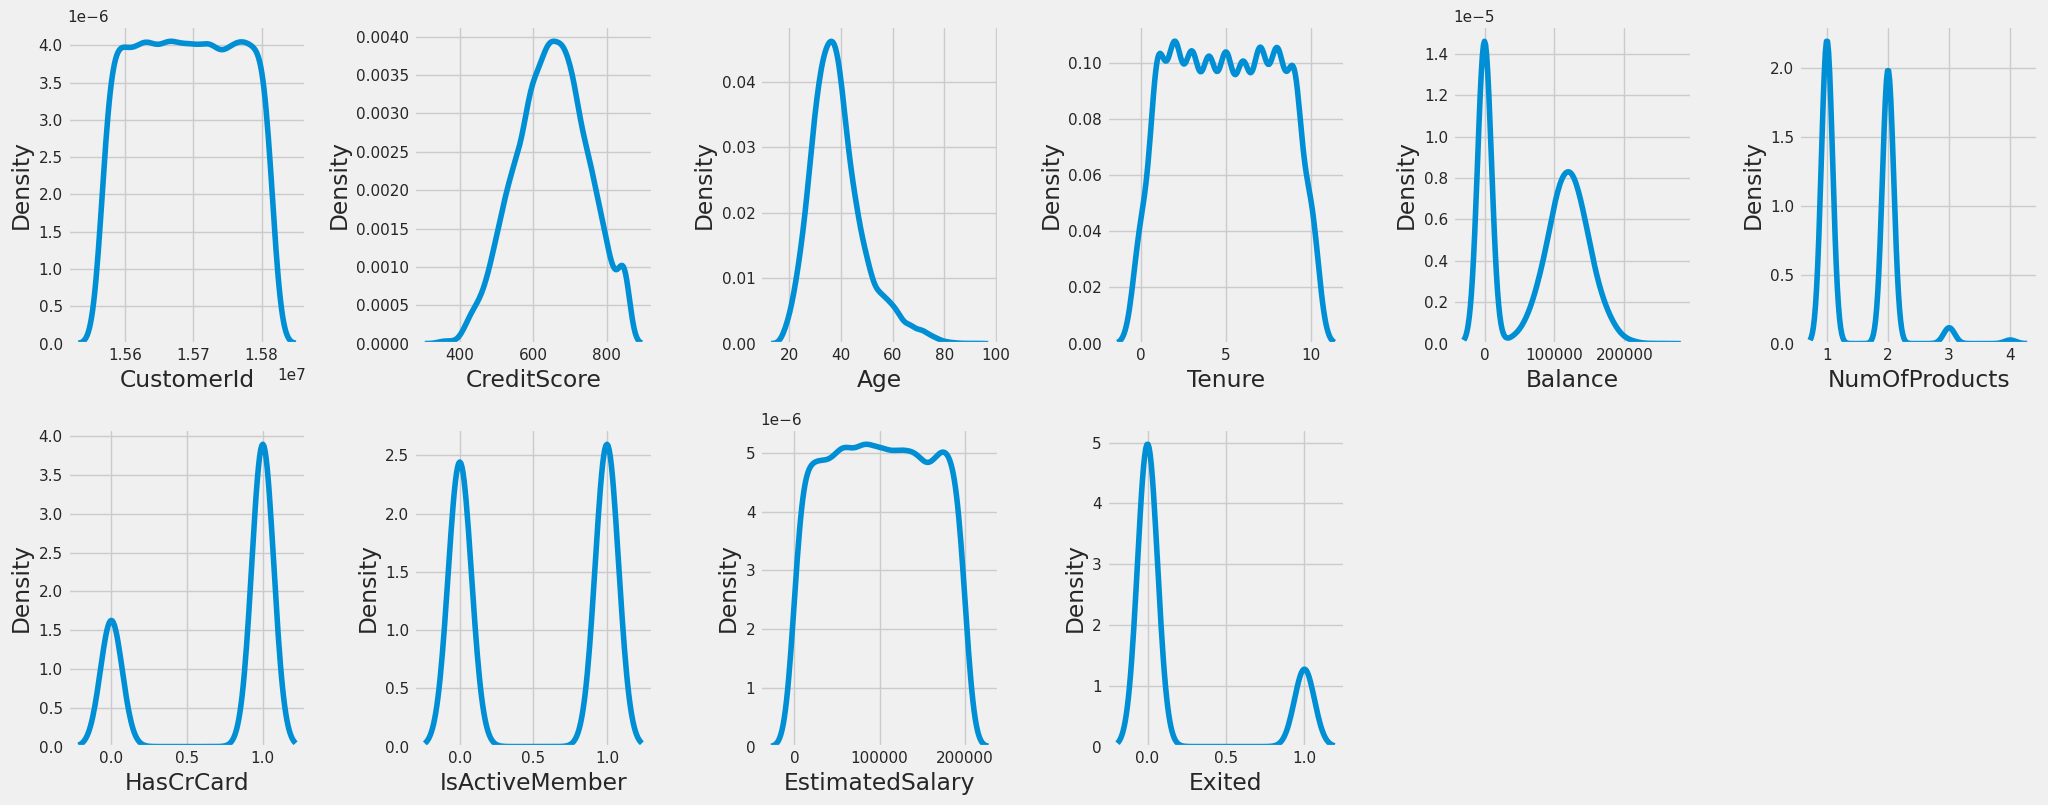

In [13]:
# Individual Distplot/KDE Plot (Numerical)

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, 6, i+1)
    sns.kdeplot(df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

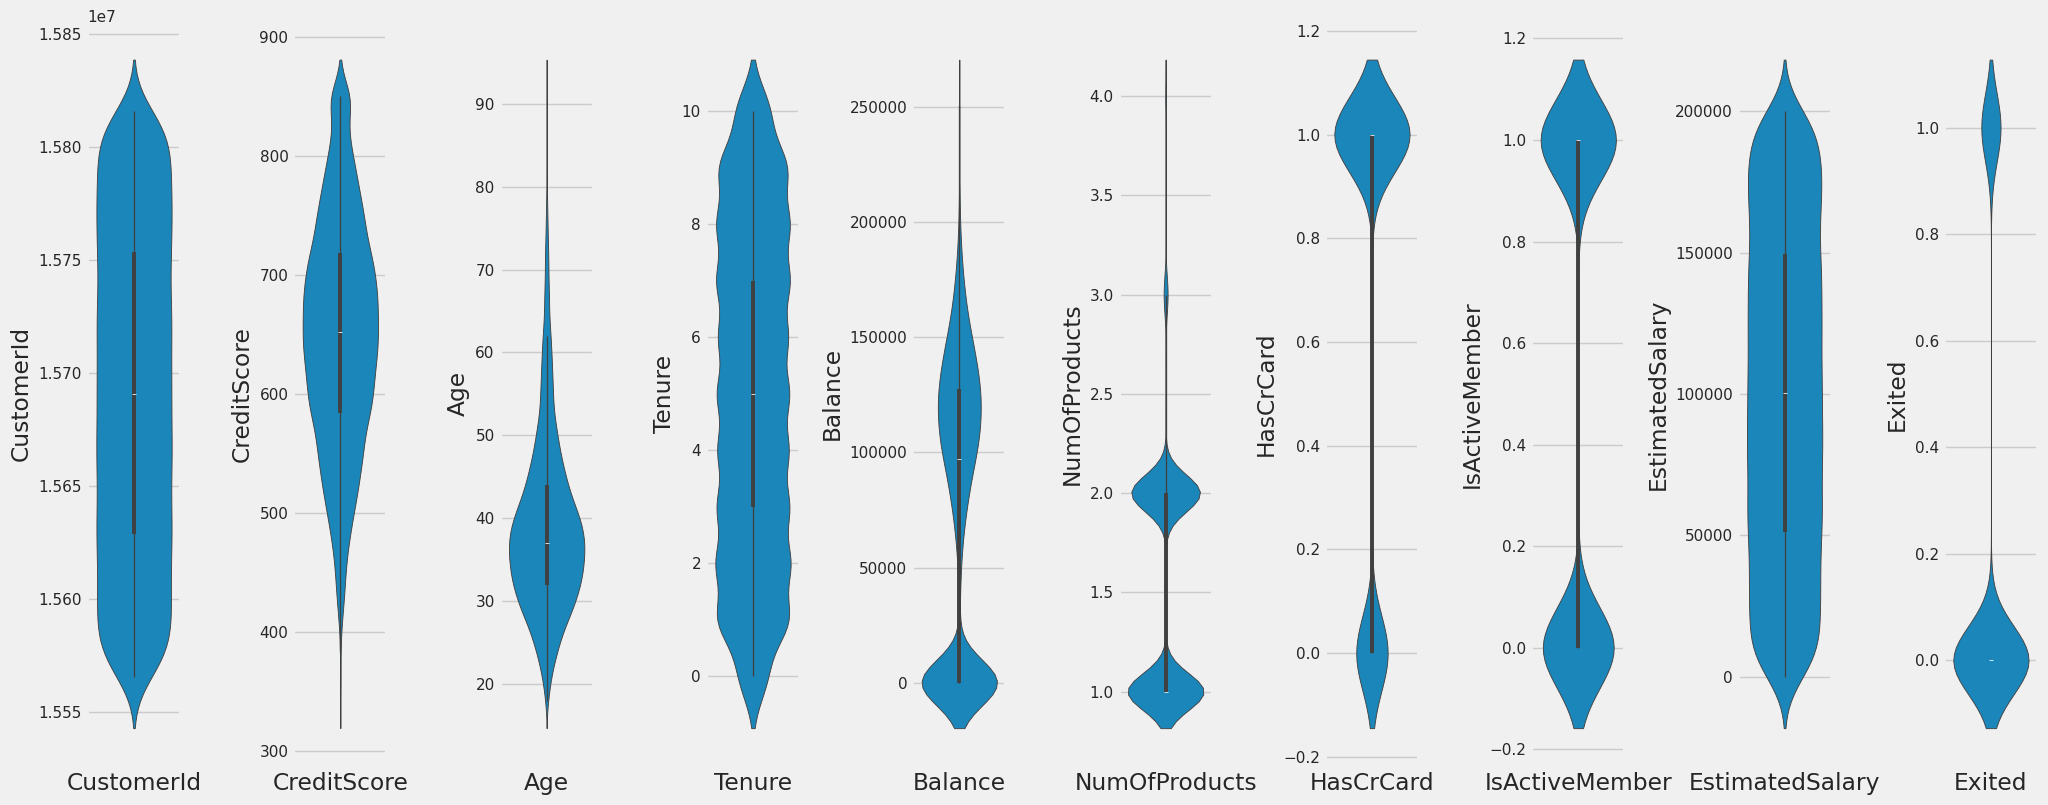

In [14]:
# Individual Violin Plots (Numeric)

features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

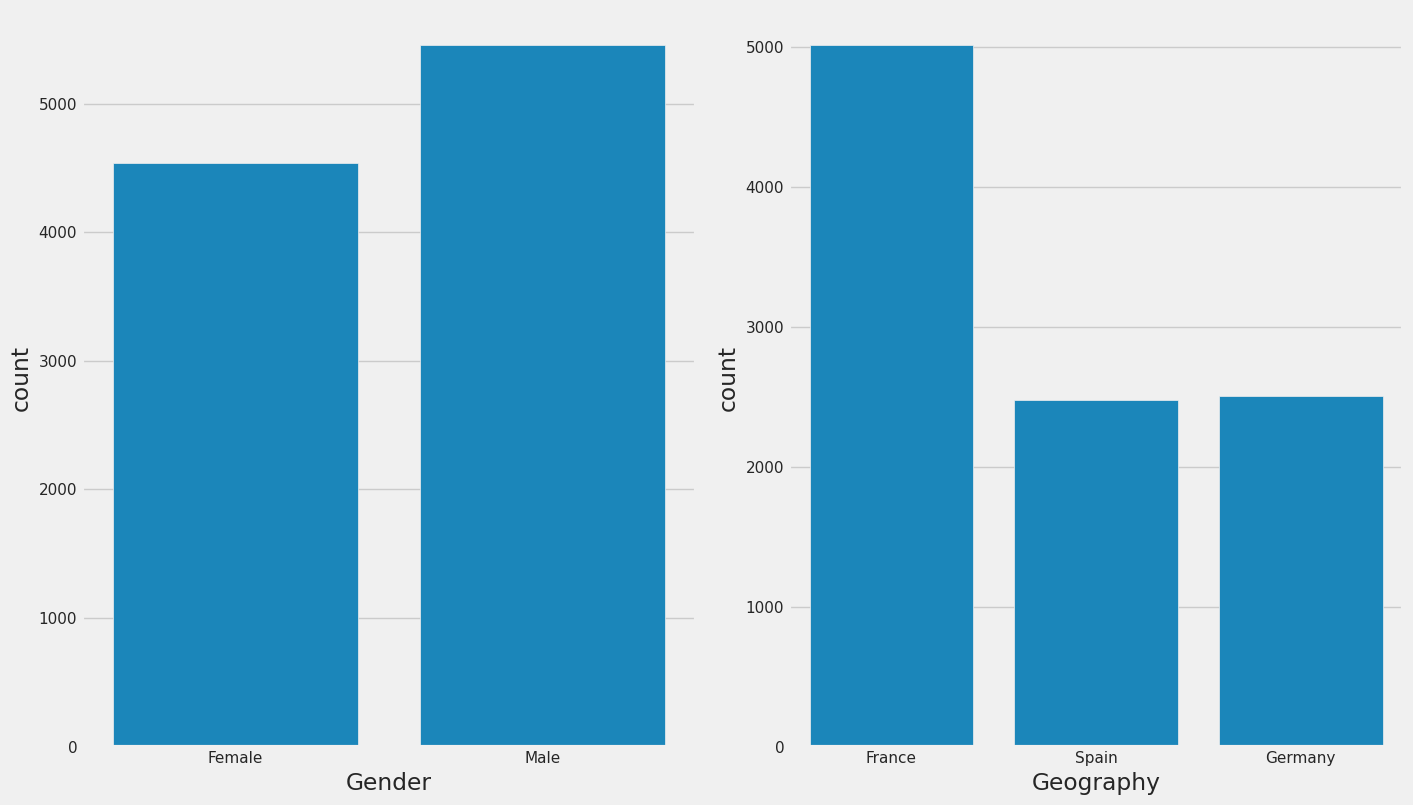

In [15]:
# Individual Countplot (Categorical)

features = categorical
for i in range(1, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

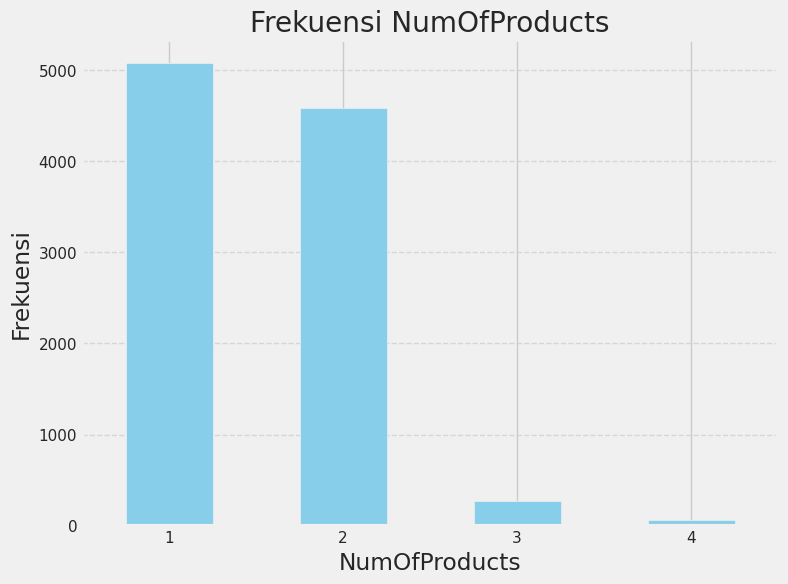

In [16]:
# Variabel NumOfProducts
plt.figure(figsize=(8, 6))
df['NumOfProducts'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frekuensi NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


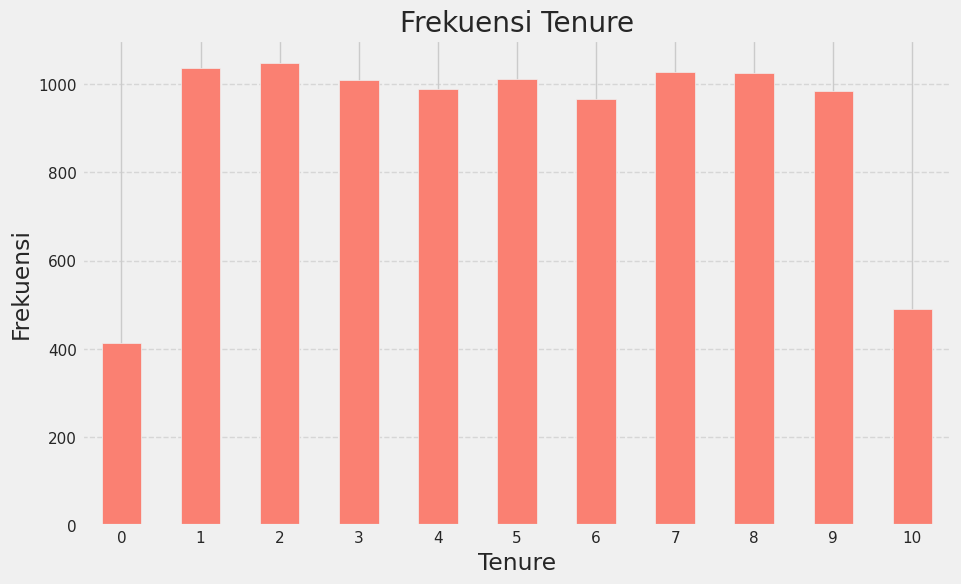

In [17]:
# Variabel Tenure
plt.figure(figsize=(10, 6))
df['Tenure'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Frekuensi Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


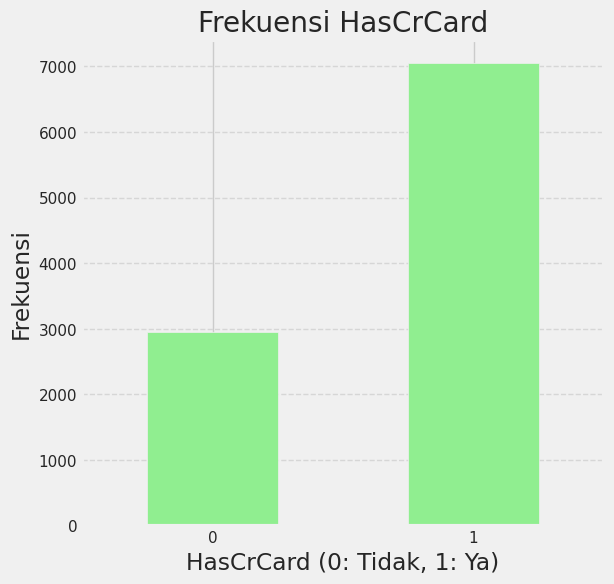

In [18]:

# Variabel HasCrCard
plt.figure(figsize=(6, 6))
df['HasCrCard'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Frekuensi HasCrCard')
plt.xlabel('HasCrCard (0: Tidak, 1: Ya)')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Hasil Observasi

<li> Berdasarkan boxplot, ditemukan adanya outliers pada beberapa fitur, yaitu CreditScore, Age, dan NumOfProduct. </li>
<li> Berdasarkan boxplot, terdapat nilai yang mendominasi pada fitur Exited, yaitu sebagian besar di 0 (Not Exited) </li>
<li> Berdasarkan displot/kdeplot, dapat diketahui distribusi setiap kolom. Diketahui bahwa fitur CustomerId, Tenure, dan EstimatedSalary berdistribusi normal. Sedangkan fitur Balance dan NumOfProduct berdistribusi bimodal. Fitur CreditScore dan Age hampir mendekati distribusi normal atau memiliki skew. </li>
<li> Berdasarkan violinplot, diperoleh hasil yang sama seperti boxplot, yaitu kita dapat menemukan outliers pada beberapa fitur, yaitu  CreditScore, Age, dan NumOfProduct yang ditunjukkan oleh tidak adanya kepadatan setelah batas IQR (interquartile). Selain itu, dapat diketahui juga bahwa pada fitur HasCrCard lebih banyak customer yang memiliki credit card daripada yang tidak memiliki credit card serta pada fitur Exited dapat diketahui bahwa lebih banyak customer yang tidak exited (tidak churn) daripada customer yang exited (churn). </li>
<li> Pada data kategorikal, diketahui customer laki-laki lebih banyak daripada customer perempuan. Selain itu, paling banyak ditemukan pengguna bertempat tinggal di France.</li>

# Nomor 3
# Multivariate Analysis

<Axes: >

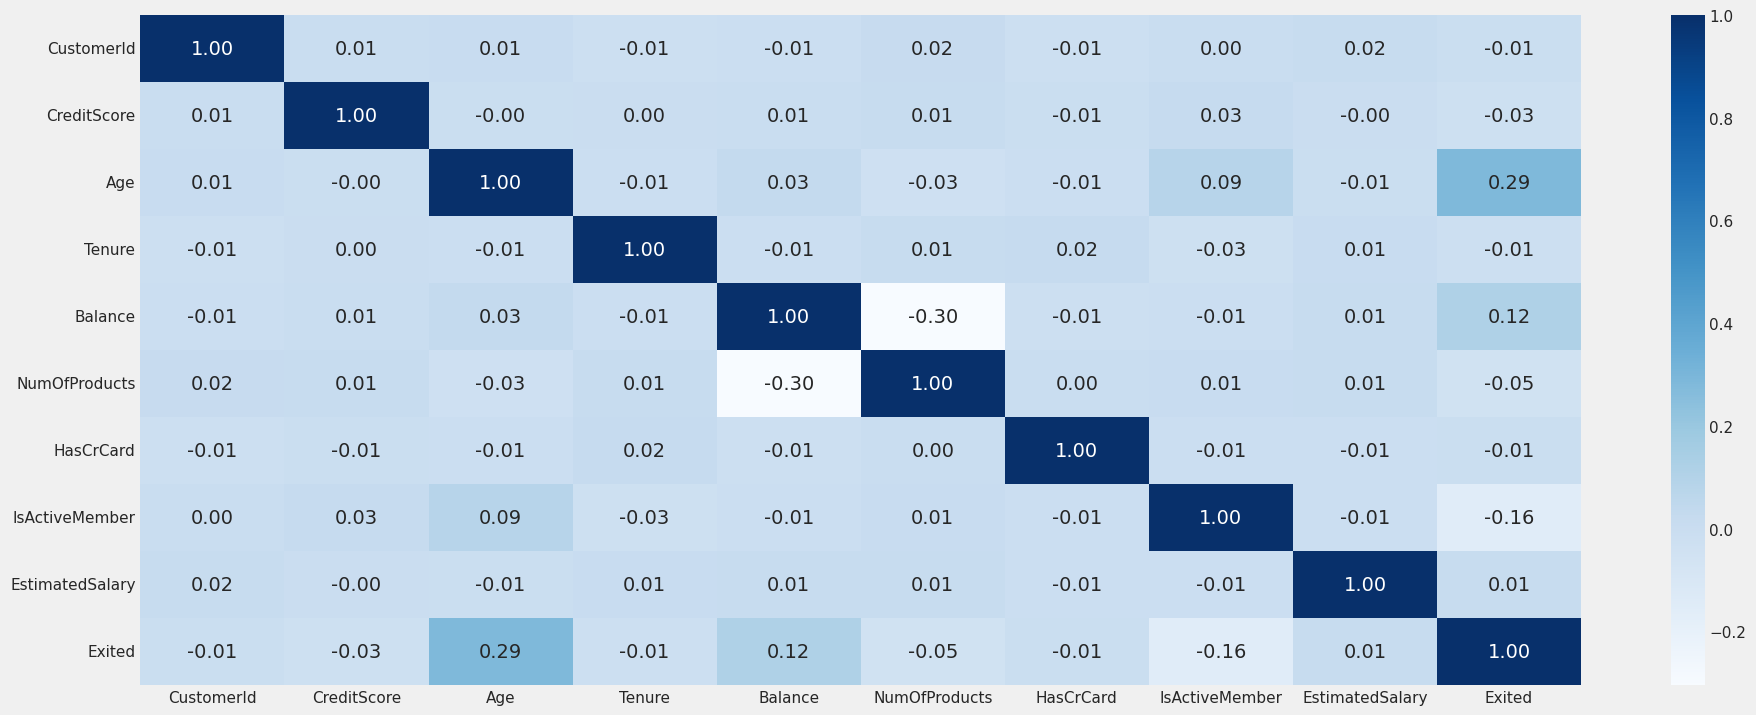

In [19]:
# Correlation Heatmap (Numeric)

sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f', cmap='Blues')

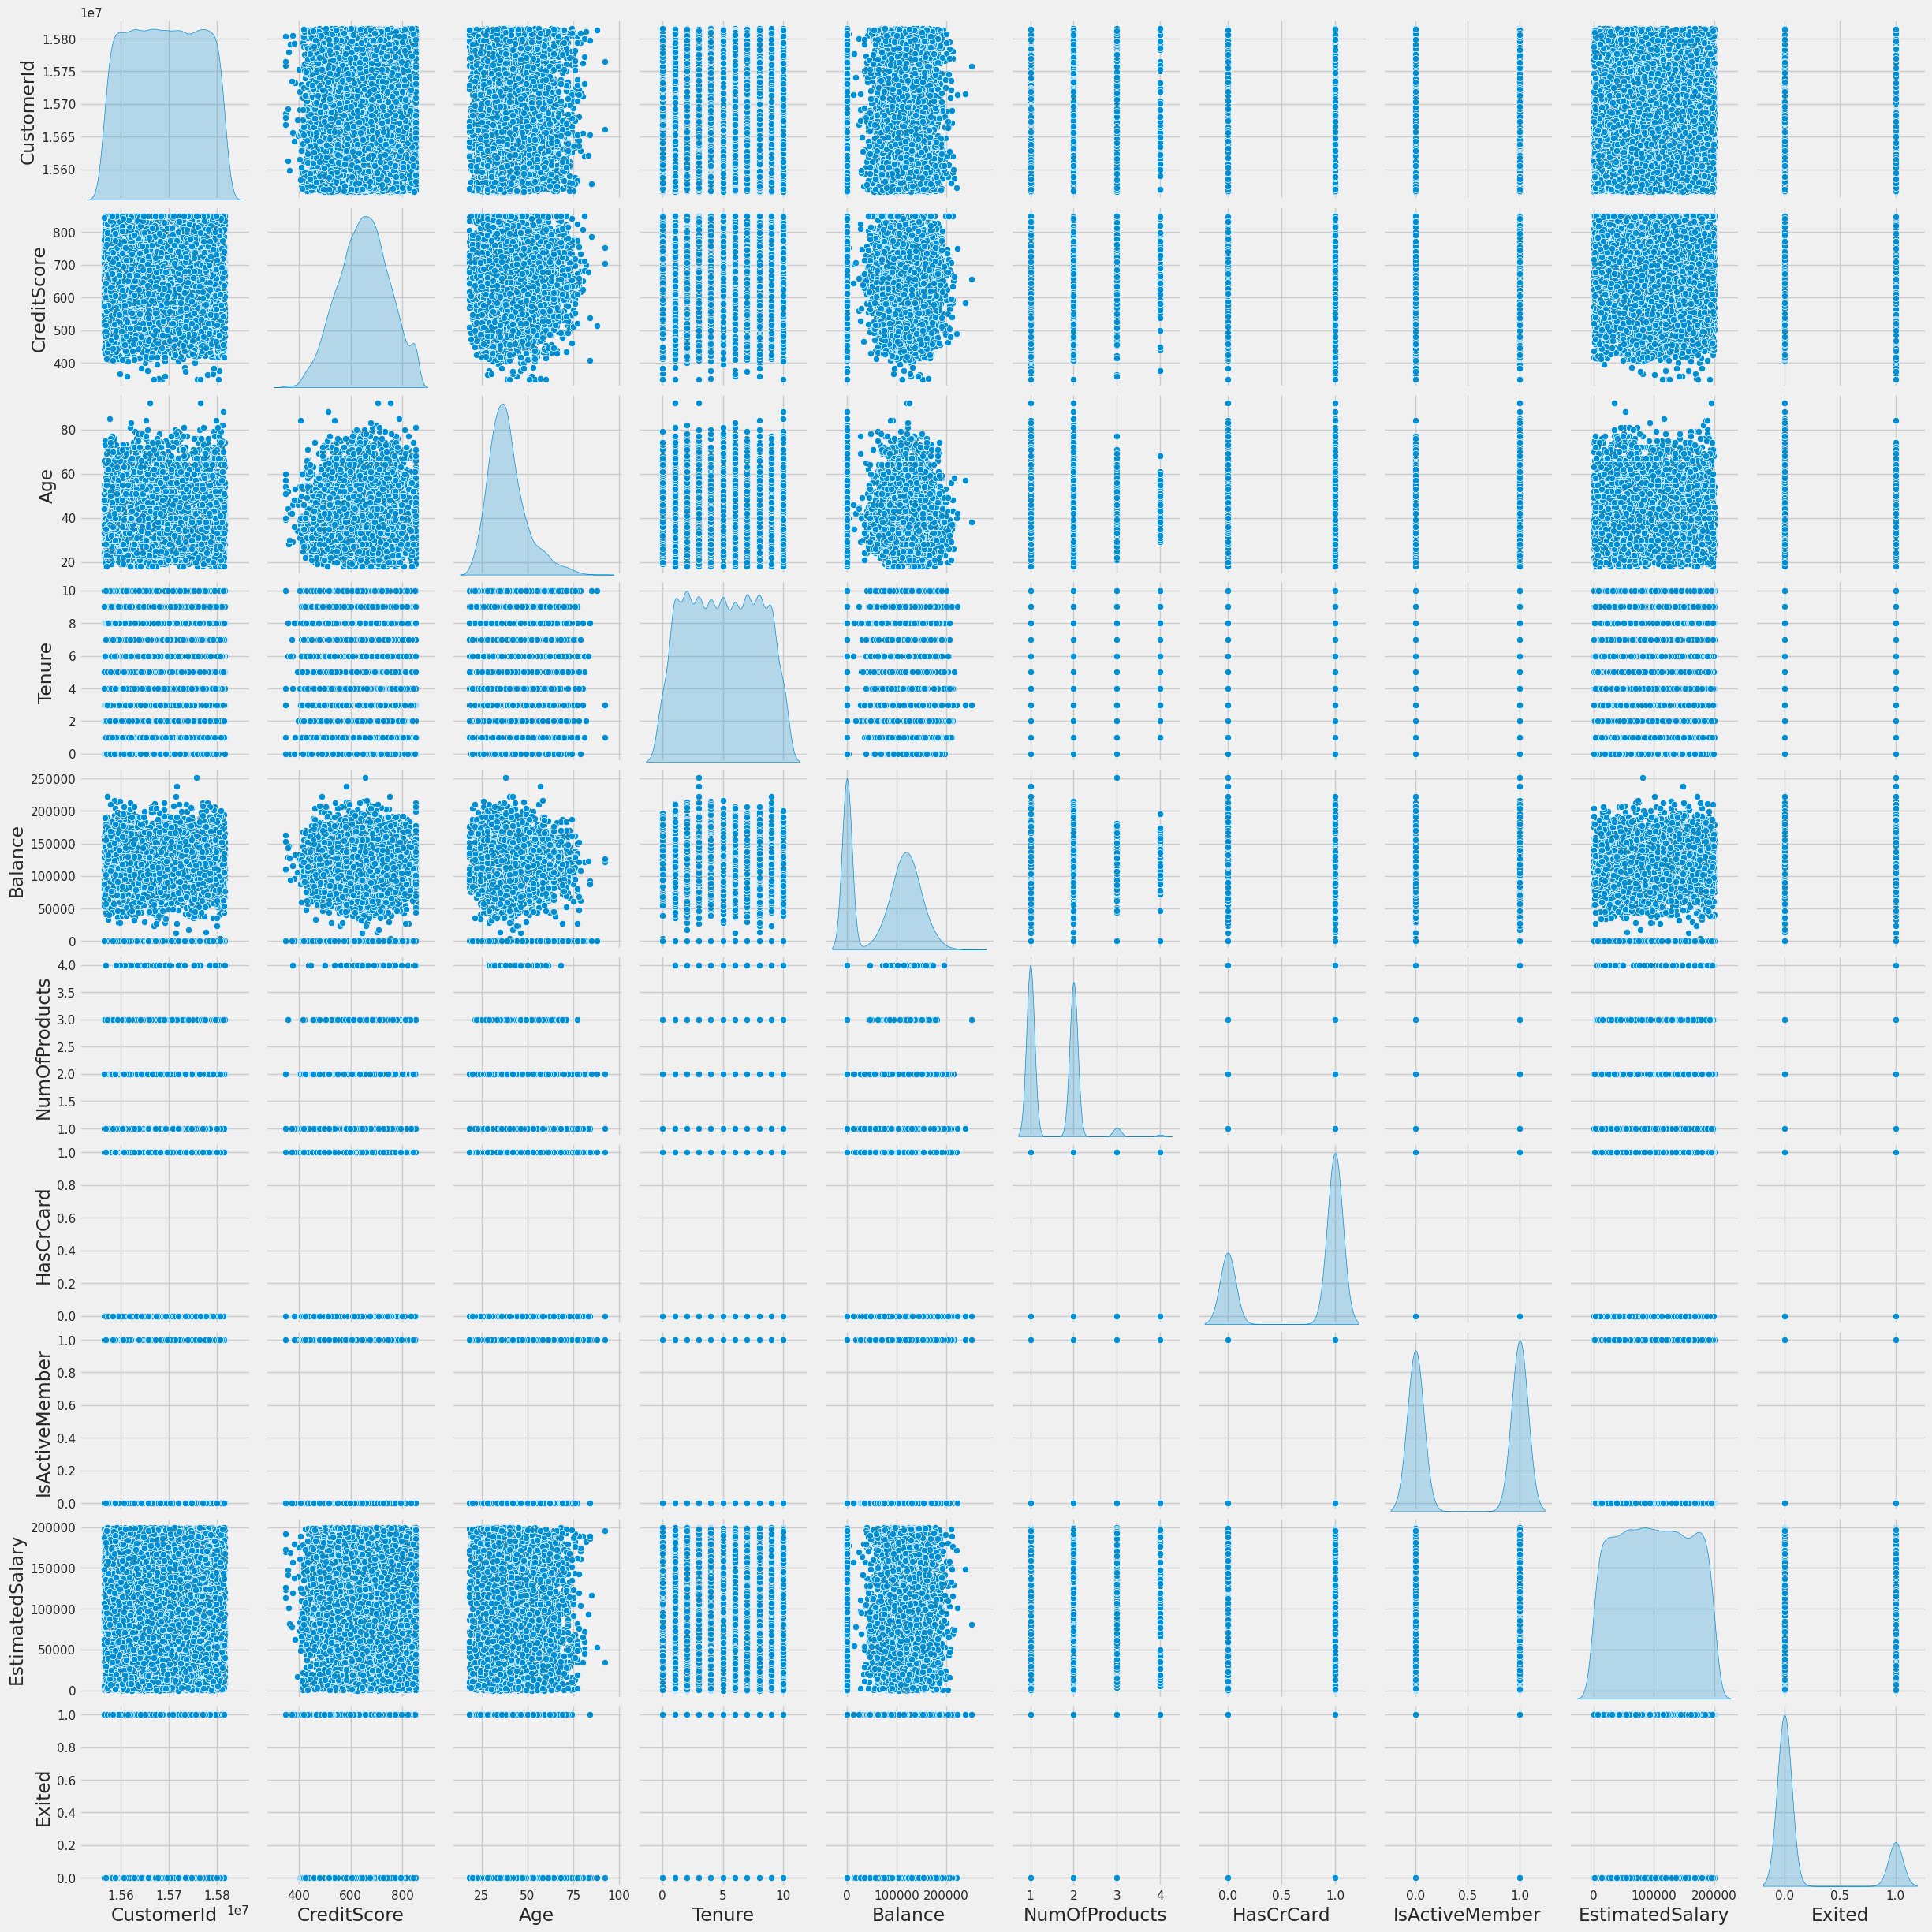

In [20]:
# Pair Plots (Numeric)

sns.pairplot(df[numerical], diag_kind='kde')

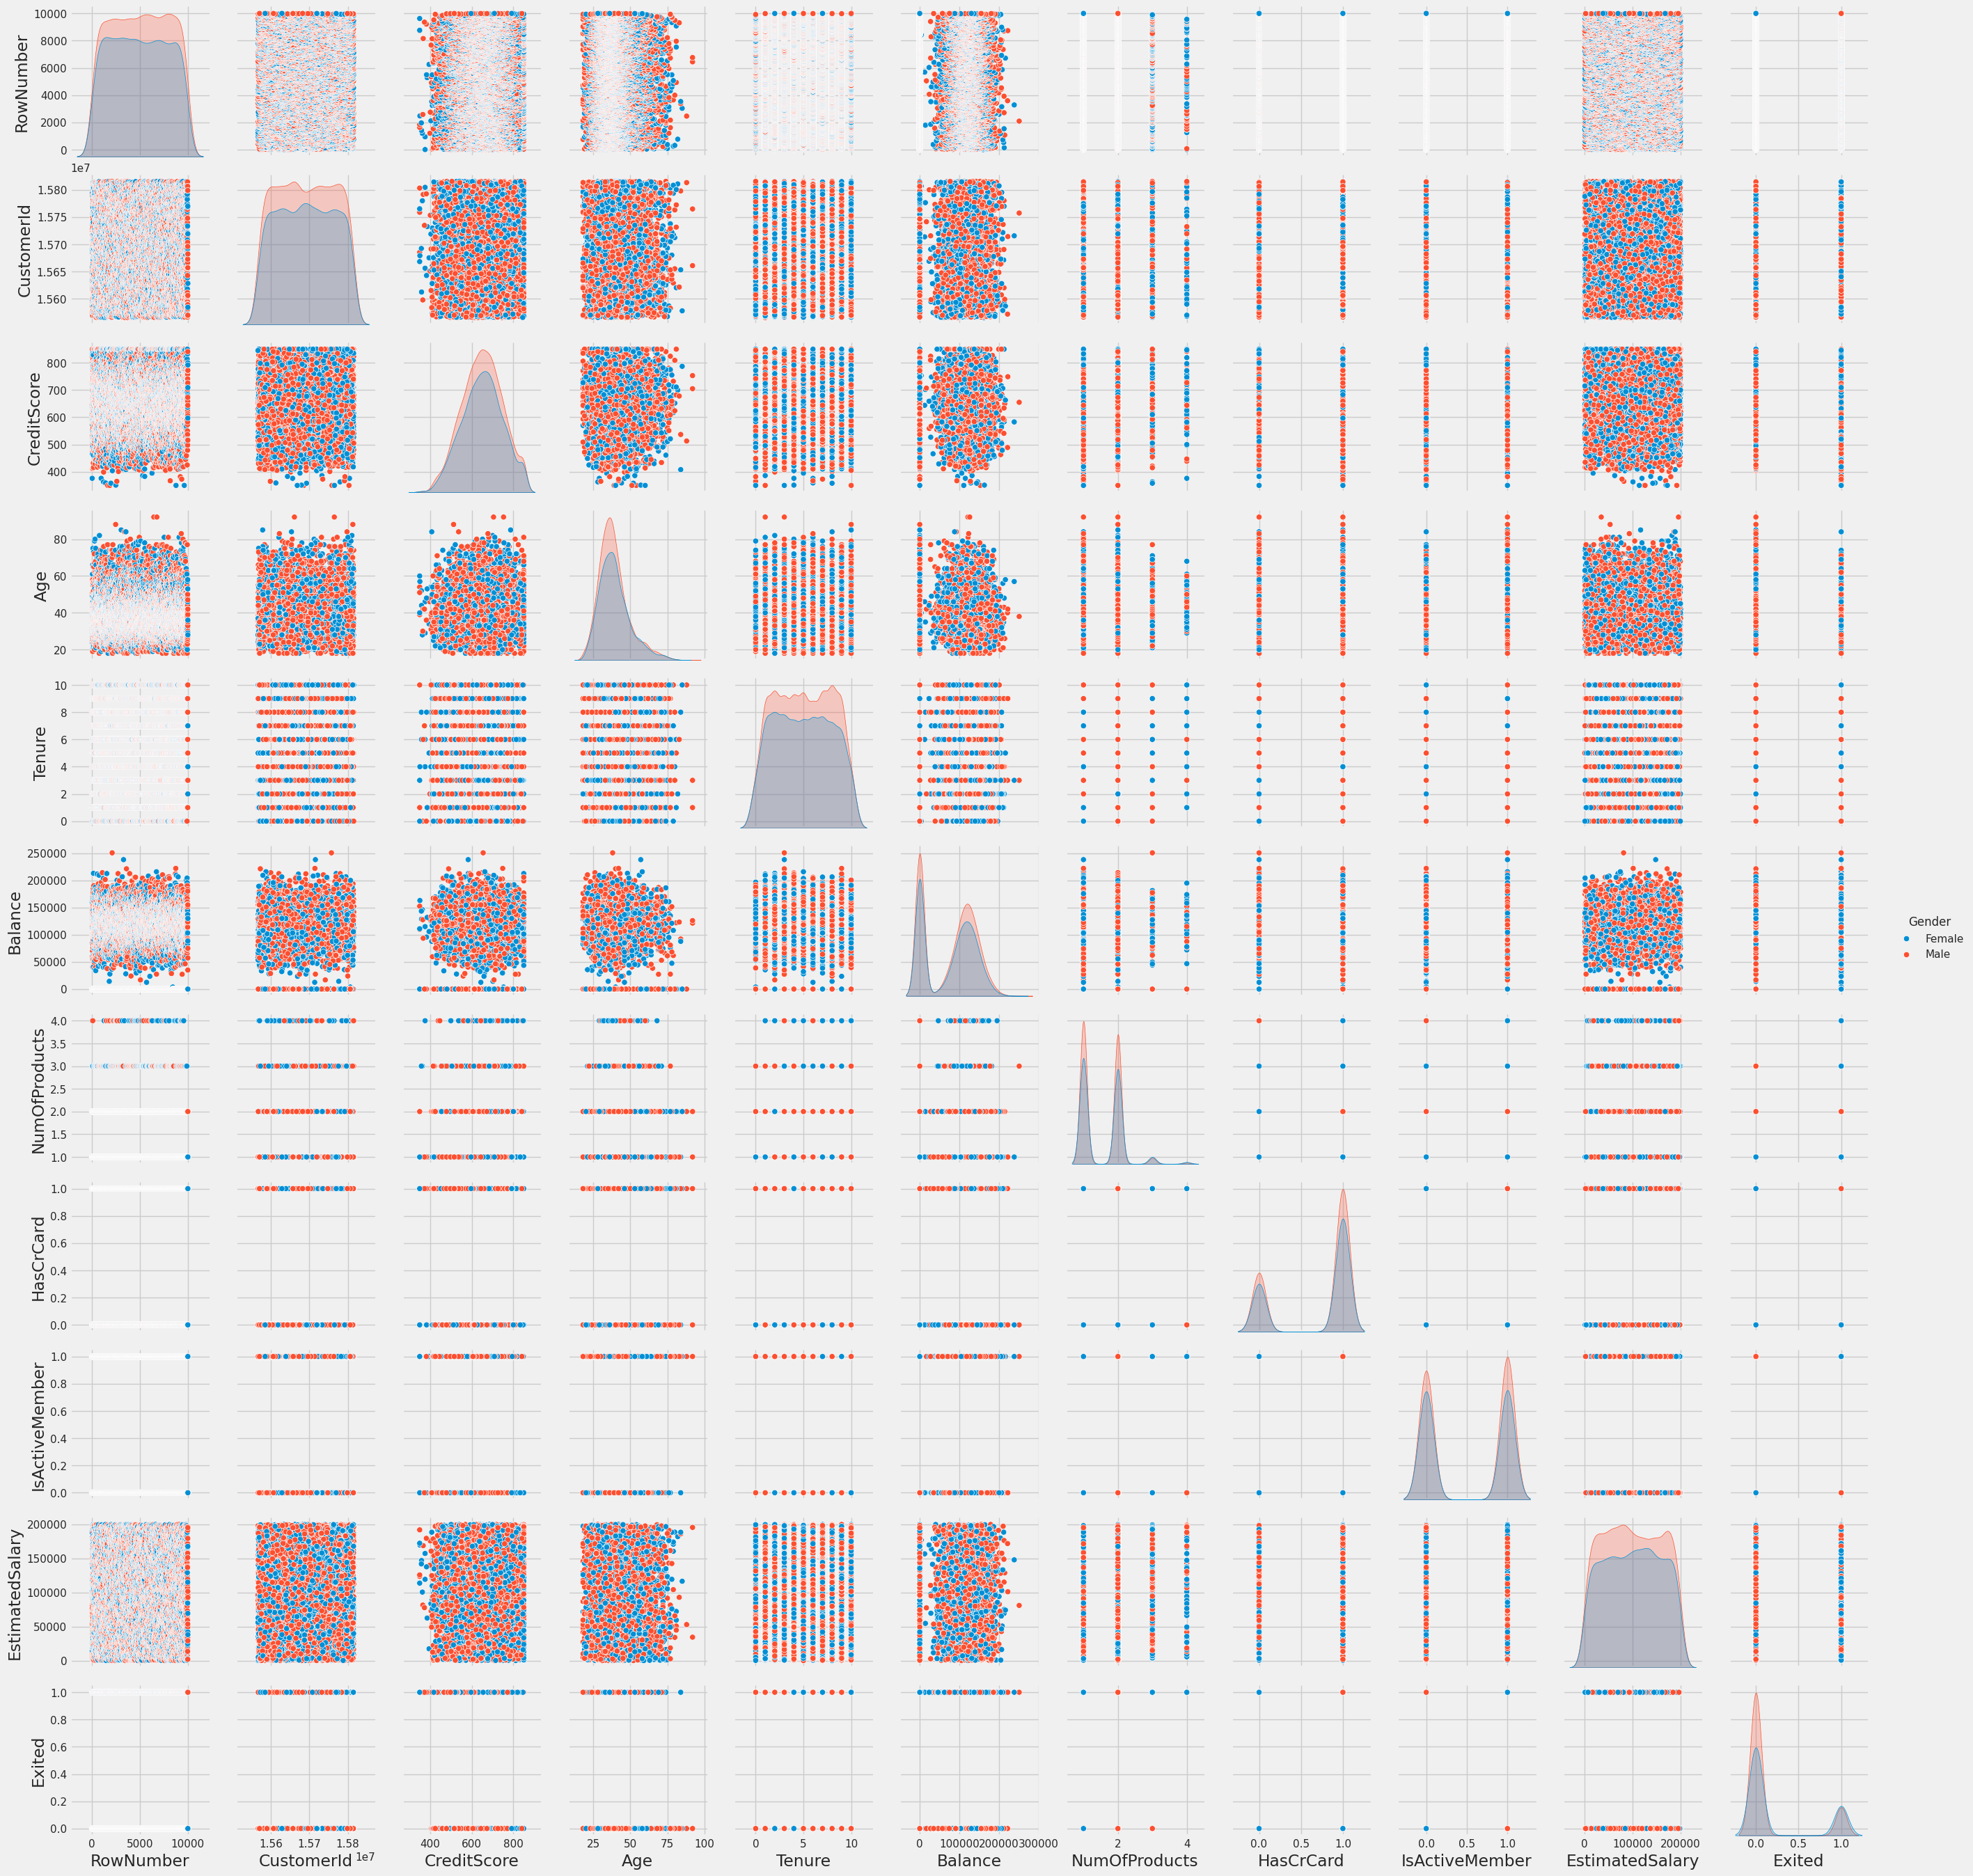

In [21]:
# Pair Plots + Hue (Numeric)

sns.pairplot(df, diag_kind='kde', hue='Gender')

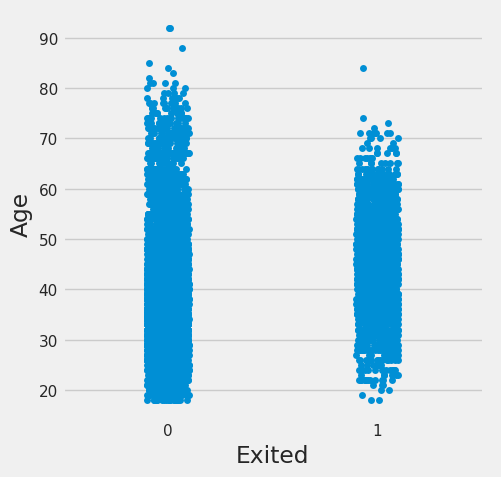

In [22]:
# Category Plots (Categorical - Numeric)

sns.catplot(data=df, x='Exited', y='Age')

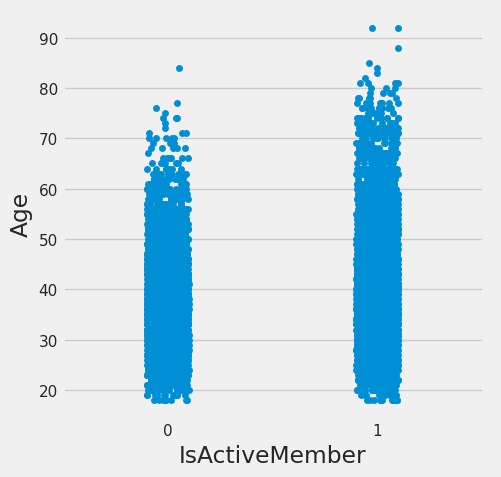

In [23]:
sns.catplot(data=df, x='IsActiveMember', y='Age')

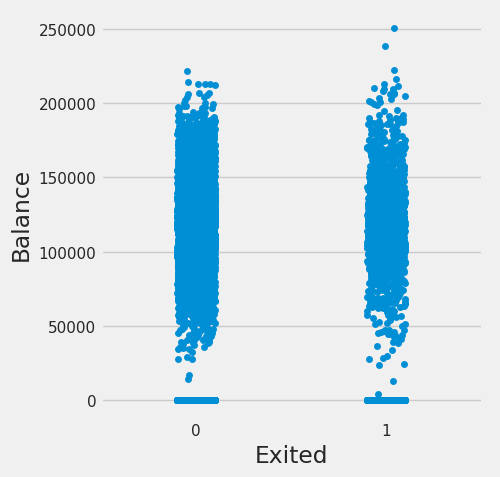

In [24]:
sns.catplot(data=df, x='Exited', y='Balance')

##PCA

In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Preprocessing
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [27]:
# Split data into features and target
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

In [28]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

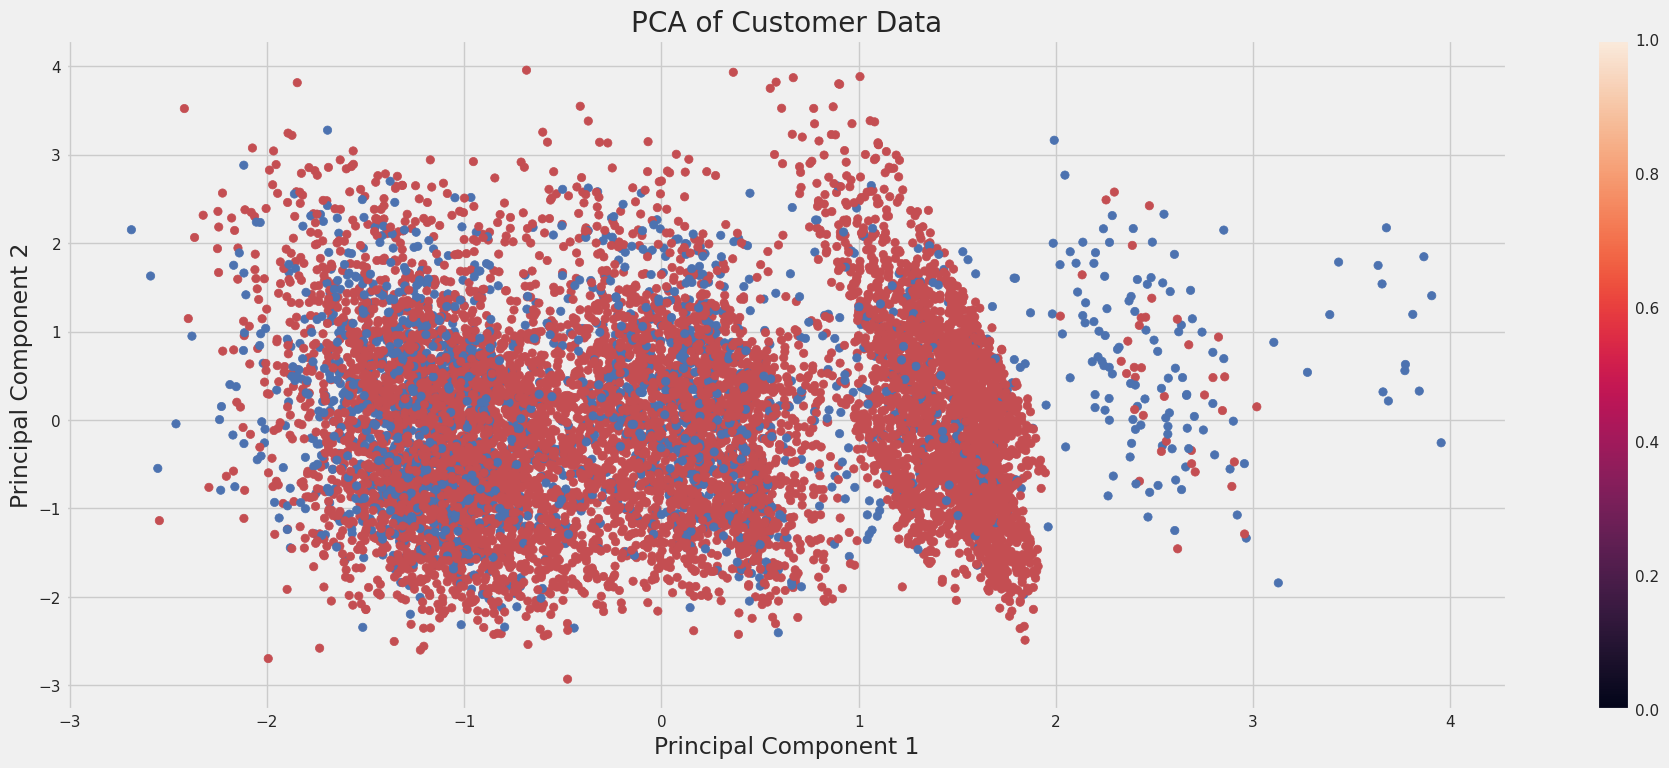

In [29]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
colors = ['r' if label == 0 else 'b' for label in y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Data')
plt.colorbar()
plt.show()

In [30]:
# Get the loadings (the importance of each feature on each component)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame with the loadings and the names of the original variables
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)

loadings_df

PC1       PC2
CreditScore      0.010732  0.181644
Geography       -0.176716  0.150116
Gender          -0.069172 -0.093795
Age             -0.159370  0.628900
Tenure           0.068363 -0.288870
Balance         -0.800461 -0.085129
NumOfProducts    0.781134  0.116026
HasCrCard        0.058862 -0.215262
IsActiveMember  -0.010146  0.692715
EstimatedSalary  0.008891 -0.113516

In [31]:
# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2349   67]
 [ 483  101]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000



In [32]:
# Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_predictions = forest.predict(X_test)
print(confusion_matrix(y_test, forest_predictions))
print(classification_report(y_test, forest_predictions))

[[2338   78]
 [ 313  271]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.86      3000



## Hasil Observasi

1) Berdasarkan heatmap, terdapat korelasi positif antara fitur Age dengan Exited, namun berkorelasi lemah sebesar 0.29. Selain itu juga terdapat korelasi positif antara fitur Balance dengan Exited namun berkorelasi sangat lemah sebesar 0.12 serta terdapat korelasi positif antara fitur Age dengan IsActiveMember dengan korelasi sangat lemah sebesar 0.09.

2) Berdasarkan heatmap, terdapat juga korelasi negatif antara fitur NumOfProducts dengan Balance, namun berkorelasi lemah sebesar -0.30. Selain itu juga terdapat korelasi negatif antara fitur IsActiveMember dengan Exited namun berkorelasi sangat lemah sebesar -0.16.

3) Fitur lainnya tidak saling berkorelasi karena berdasarkan heatmap diketahui nilai korelasinya sangat rendah.

4) Berdasarkan catplot pertama yang menunjukkan hubungan antara Exited dengan Age, diketahui bahwa customer yang exited (churn) didominasi oleh customer berusia 30-60 tahun.

5) Pada catplot kedua yang menunjukkan hubungan antara IsActiveMember dan Age, diketahui bahwa customer yang sudah tidak aktif didominasi oleh customer berusia 20-60 tahun.

6) Pada catplot ketiga yang menunjukkan hubungan antara Exited dan Balance, diketahui bahwa customer yang exited (churn) didominasi oleh customer yang memiliki Balance sebesar 75000-150000.

# Nomor 4
# Business Insights

### 1.  Churn Rate by Geography

Mengidentifikasi apakah ada wilayah tertentu yang menunjukkan tingkat churn yang lebih tinggi dibandingkan dengan yang lain. Misalnya, jika pelanggan dari suatu negara secara konsisten menunjukkan tingkat churn yang lebih tinggi, investigasi mengenai alasan potensial seperti persaingan lokal, faktor budaya, atau perbedaan kualitas layanan. Informasi ini untuk pemasaran yang ditargetkan atau perbaikan layanan di wilayah-wilayah dengan tingkat churn yang tinggi.

In [33]:
df = pd.read_csv('churn.csv')

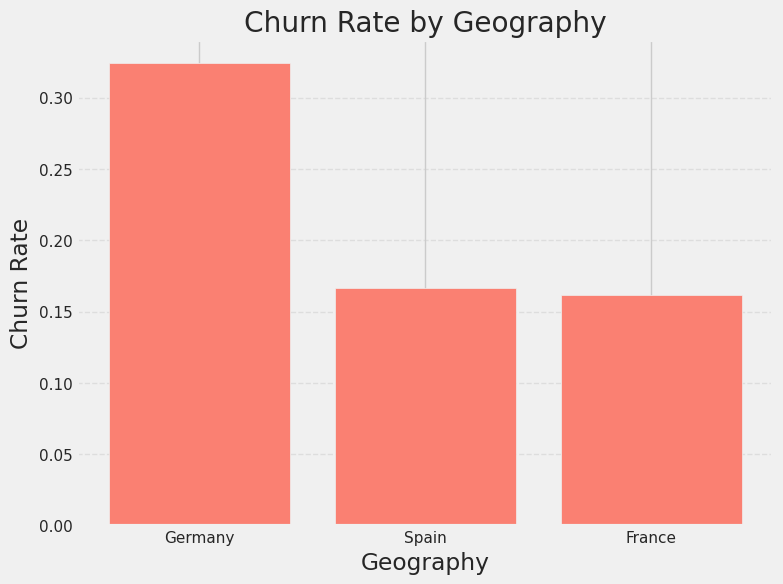

In [34]:
geo_churn = df.groupby('Geography')['Exited'].mean().reset_index()
geo_churn = geo_churn.sort_values(by='Exited', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(geo_churn['Geography'], geo_churn['Exited'], color='salmon')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 2. Churn Rate by Gender

Interpretasi churn rate (tingkat churn) berdasarkan gender guna untuk analisis segmentasi terhadap seberapa sering pelanggan dari masing-masing gender meninggalkan atau berhenti menggunakan produk

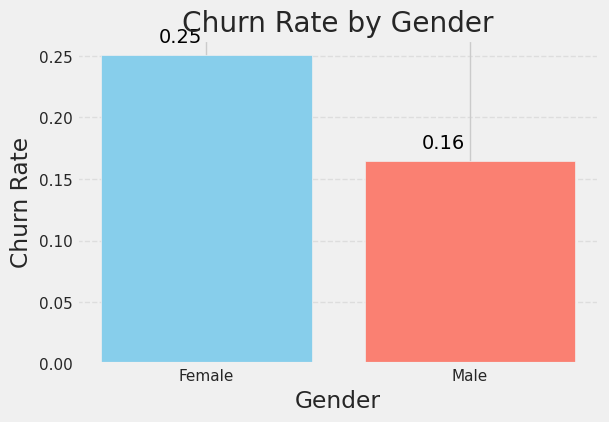

In [35]:
gender_churn = df.groupby('Gender')['Exited'].mean().reset_index()

plt.figure(figsize=(6, 4))
bars = plt.bar(gender_churn['Gender'], gender_churn['Exited'], color=['skyblue', 'salmon'])
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar, rate in zip(bars, gender_churn['Exited']):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.01, f'{rate:.2f}', ha='center', color='black')

plt.show()

### 3. Churn Rate by Tenure

Interpretasi tenur dalam customer churn membantu dalam memahami pola atau perilaku pelanggan sehubungan dengan berapa lama mereka tetap sebagai pelanggan sebelum mereka meninggalkan bisnis atau beralih ke pesaing.

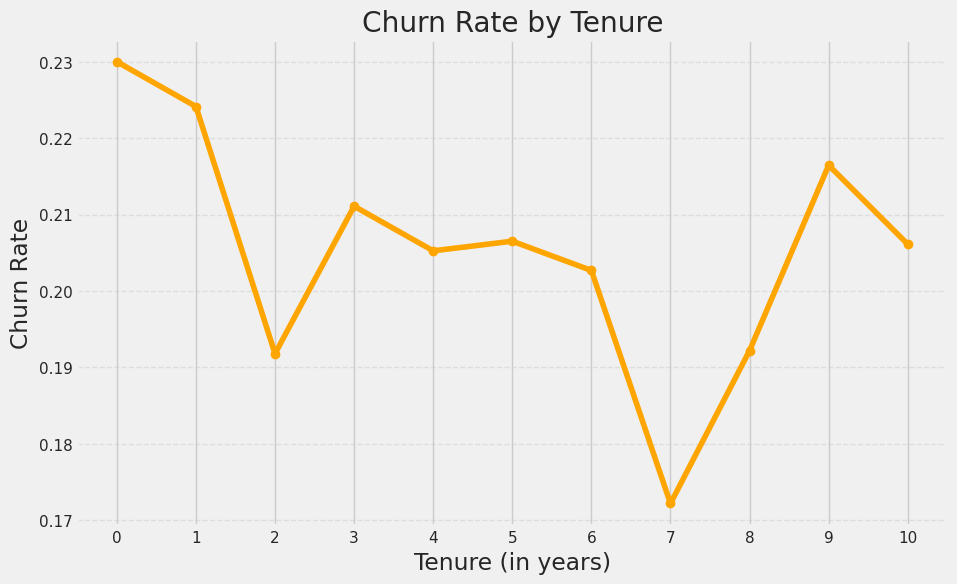

In [36]:

tenure_churn = df.groupby('Tenure')['Exited'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(tenure_churn['Tenure'], tenure_churn['Exited'], marker='o', color='orange')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (in years)')
plt.ylabel('Churn Rate')
plt.xticks(ticks=tenure_churn['Tenure'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


## **Hasil Observasi**

1.  **Churn Rate by Geography:**

 Negara Germany merupakan tingkat churn tertinggi dibandingkan 2 negara Spain dan France. Sementara negara Spain dan France memiliki churn rate yang hampir sama.

 **Rekomendasi Bisnis:** karena negara Germany yang mempunyai tinggkat churn yang tinggi, maka perusahaan perlu analisis lanjut untuk fokus terhadap faktor kenapa tingkat churn di negara Germany itu sangat tinggi dibandingkan negara Spain dan France.


2.   **Churn Rate by Gender:**
 Dalam kasus segmentasi gender, tingkat churn pada gender Female cukup tinggi jika dibandingkan dari selisih Male yakni dengan selisih 0.9.

  **Rekomendasi Bisnis:** Karena gender Female memiliki tingkat churn yang tinggi maka perlu ada analisis segmen pelanggan Female menjadi kelompok yang lebih kecil berdasarkan demografi, perilaku, atau preferensi. Ini akan membantu dalam mengidentifikasi pola churn yang lebih spesifik dan mengarah pada strategi retensi yang lebih efektif.

3. **Churn Rate by Tenure:**
 Tenur dengan range tahun 0 - 2 mengalami penurunan, range tahun 2 - 3 mengalami sedikit kenaikan, range tahun 3 - 4 sedikit menurun/ agak stabil, range tahun 6 - 7 mengalami penurunan, range tahun 7 - 9 mengalami kenaikan yang signifikan, dan range tahun 9 - 10 mengalami sedikit penurunan.

  **Rekomendasi Bisnis:** Dari insight di atas, dapat disimpulkan bahwa penting untuk mengidentifikasi fase-fase kritis terutama pada kenaikan tinggkat churn di tenur dengan range tahun 7 - 9. Artinya tenur dengan range tahun 7 - 9 harus menjadi prioritas untuk dilakukan analisis lebih mendalam dan lebih spesifik guna mengarah pada strategi retensi yang lebih efektif.


